In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.interpolate import *
from scipy.integrate import quad
%matplotlib inline

In [2]:
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'viridis',
    'axes.grid': False,
    'savefig.dpi': 30000,  # to adjust notebook inline plot size
    'axes.labelsize': 15, # fontsize for x and y labels (was 10)
    'axes.titlesize': 16,
    'font.size': 12, # was 10
    'legend.fontsize': 14, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': True,
    #'figure.figsize': [3.39, 2.10],
    'figure.figsize': [6.39, 5.10],
    'font.family': 'serif',
}

In [3]:
plt.rcParams.update(params)

In [4]:
k=8.62*10**(-5) #Boltzmann constant (eV/K)
hp=4.136*10**(-15) #Planck constant (eV*s)
Tg=2.73 #CMB photon temperature (K)
c=2.998e8 #speed of light (m/s)
mn=0.02/(c**2) #neutrino mass (eV/c^2)
L=mn*c**2/(k*Tg*(4/11)**(1/3))
h=0.72 #hubble
p0=1.88*h**2*10**(-26)*1.783*10**36 #current critical energy density
wr=5*10**(-5) #radiation
wm=.29601976
alphaBAO=.2968737
rfid=147.78
rsBAO=137.5

In [5]:
def wn(z):
    def n_integrand(x,z):
        return x**2*np.sqrt((1/(1+z))**2+x**2)/(np.exp(x*L)+1)
    n=quad(n_integrand,0,np.inf,args=(z))
    return n[0]*((3*c**5*mn**4)*(1/(1+z))**(-4)*p0**(-1)*(np.pi)**(-2)*hp**(-3))

In [6]:
be=np.loadtxt("BAO_consensus_covtot_dM_Hz.txt")
co=([be[0,0],be[0,2],be[0,4]],[be[2,0],be[2,2],be[2,4]],[be[4,0],be[4,2],be[4,4]])
errors=np.sqrt(np.diag(co))

In [7]:
zgridwn=np.arange(.01,1,.01)
wngrid=np.array([])
for i in range(len(zgridwn)):
    wngrid=np.append(wngrid,wn(zgridwn[i]))
wn_cs=sp.interpolate.CubicSpline(zgridwn,wngrid)
def integrand(x,wm,wr,wn_cs):
    return 1/(np.sqrt(wm*x+(1-wm-wr-wn_cs((1/x)-1))*x**4+wr+wn_cs((1/x)-1)))
rs=138.3
rs2=180
def D(z):
    return quad(integrand,1/(1+z),1,args=(wm,wr,wn_cs))[0]*alphaBAO*100*rs
print(D(1090.05))
zgrid0=np.arange(0,.1,.001)
zgrid1=np.arange(.1,3,.1)
zgrid2=np.arange(4,1100,1)
zgrid=list(zgrid0)+list(zgrid1)+list(zgrid2)
Dgrid=np.array([])
for i in range(len(zgrid)):
    Dnew=D(zgrid[i])
    Dgrid=np.append(Dgrid,Dnew)
#Dgrid2=Dgrid/rs*rs2
zdata=[0.38,0.51,0.61]
Dzdata=np.array([1512.39,1975.22,2306.68])*rsBAO/rfid
#Dzdata2=Dzdata/rs*rs2
Dzdataguess=np.array([])
for i in range(len(zdata)):
    Dzdataguess=np.append(Dzdataguess,D(zdata[i]))
residuals=Dzdata/Dzdataguess-1
#Dzdataguess2=np.array([])
#for i in range(len(zdata)):
#    Dzdataguess2=np.append(Dzdataguess2,(D(zdata[i])/rs*rs2))
#residuals2=Dzdata2/Dzdataguess2-0.8

/nfs/home/mjoy/myVE/lib/python3.4/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


10719.75376998813


In [8]:
zSN=np.loadtxt("z_SN.txt")
zSN=np.array(zSN)
mb=np.loadtxt('mb_SN.txt')
alphaSN=.36437156*10000
D_SNgrid=np.array([])
for i in range(len(zSN)):
    #D=(1+zSN[i])**(-1)*alphaSN**(-1)*10**(((mb[i])-6)/5)*rs*alphaBAO*100
    D=(1+zSN[i])**(-1)*10**((mb[i]-6+0.25)/5)
    D_SNgrid=np.append(D_SNgrid,D)

In [9]:
DzdataguessSN=np.array([])
def D(z):
    return quad(integrand,1/(1+z),1,args=(wm,wr,wn_cs))[0]*alphaBAO*100*rs
for i in range(len(zSN)):
    z2=zSN[i]
    DzdataguessSN=np.append(DzdataguessSN,(D(z2)))
SNresiduals=D_SNgrid/DzdataguessSN-1

In [10]:
mbdata=np.loadtxt("mb_SN.txt")
dmbdata=np.loadtxt("dmb_SN.txt")
Csys=np.loadtxt("SNe_Csys.txt")
Csys=np.array(Csys)
shape=(40,40)
Csys=Csys.reshape(shape) #systematic error covariance matrix
Cstat=np.zeros((40,40))
k=0
j=0
while k<40 and j<40:
    Cstat[k,j]=(dmbdata[k])**2 #statistical covariance matrix for SN data
    k=k+1
    j=j+1
C_SN=Cstat+Csys
SNerrors=np.sqrt(np.diag(C_SN))
print(SNerrors)

[0.0377122  0.03865285 0.02739151 0.02769531 0.03545092 0.04249282
 0.03796581 0.04612554 0.04385787 0.05116896 0.03738546 0.03673122
 0.03503473 0.02688206 0.02850881 0.0250857  0.02594581 0.02828599
 0.02224101 0.0231965  0.02401926 0.02468481 0.0236307  0.02111676
 0.02323263 0.02259071 0.02230202 0.0248995  0.02525139 0.03343692
 0.02888979 0.0303341  0.03222658 0.02817925 0.03553463 0.03085839
 0.03293175 0.03693555 0.07551839 0.09503105]


In [11]:
#nonparametric D(z)
zspline=[0,.2,.57,.8,1.3]
H0=73.52427454613752
Hz1=79.92931359719891
Hz2=100.79532187160518
Hz3=115.13102044936265
Hz4=177.71389742046352
alphaBAOnon=0.29476623274200864
alphaSNnon=0.361546946403282*10000
lsn=1.127810627199550
Hzspline=[1,Hz1/H0,Hz2/H0,Hz3/H0,Hz4/H0]
Hz_cs=sp.interpolate.CubicSpline(zspline,Hzspline)
def integrandH(z,Hz_cs):
    return 1/Hz_cs(z)
Dznonpar=np.array([])
zgrid=np.array(zgrid)
for i in range(len(zgrid)):
    #Dznonpar=np.append(Dznonpar,alphaBAOnon*100*rs*quad(integrandH,0,zgrid[i],args=(Hz_cs))[0])
    Dznonpar=np.append(Dznonpar,alphaSNnon*lsn*quad(integrandH,0,zgrid[i],args=(Hz_cs))[0])
Dzdataguessnonpar=np.array([])
for i in range(len(zdata)):
    Dzdataguessnonpar=np.append(Dzdataguessnonpar,alphaBAOnon*100*rs*quad(integrandH,0,zdata[i],args=(Hz_cs))[0])
BAOresidnonpar=Dzdata/Dzdataguessnonpar-1
SNdataguessnonpar=np.array([])
for i in range(len(zSN)):
    SNdataguessnonpar=np.append(SNdataguessnonpar,alphaBAOnon*100*rs*quad(integrandH,0,zSN[i],args=(Hz_cs))[0])
SNresidnonpar=D_SNgrid/SNdataguessnonpar-1
SNrealerrors=SNerrors*c/1000/H0/(alphaSNnon)/(1+zSN)/5*np.log(10)*10**(mbdata/5-6/5)

/nfs/home/mjoy/myVE/lib/python3.4/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


[24.99413931 30.09612932 37.08261048]


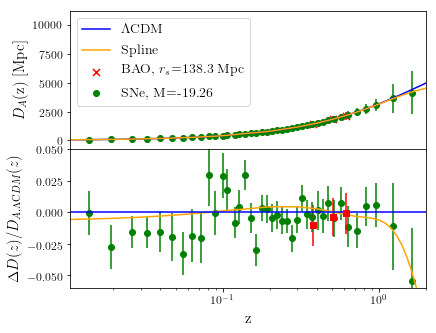

In [22]:
fig, (ax1, ax2) = plt.subplots(2,sharex=True)#,sharey=True)
ax1.plot(zgrid,Dgrid,label='$\Lambda$CDM',color='b')
ax1.plot(zgrid,Dznonpar,label='Spline',color='orange')
ax1.scatter(zdata,Dzdata,label='BAO, $r_s$=138.3 Mpc',color='r',marker='x',s=50)
ax1.scatter(zSN,D_SNgrid,label='SNe, M=-19.26',color='g')
#ax1.scatter(1090.05,rs/.0104096,color='m')
ax1.errorbar(zdata,Dzdata,yerr=10*errors*rs/rfid,linestyle='None',color='r',zorder=-100)
ax1.errorbar(zSN,D_SNgrid,yerr=10*SNrealerrors,linestyle='None',color='g')
#ax1.errorbar(1090.05,14196.5109*rs,yerr=.00071/.0104096**2*rs,linestyle='None',color='m')
ax1.legend()
ax1.set(ylabel='$D_A$(z) [Mpc]')
zdata=np.array(zdata)
ax2.scatter(zdata,residuals,color='r')
ax2.errorbar(zdata,residuals,yerr=errors/Dzdataguess*rsBAO/rfid,linestyle='None',
             marker='s',color='r')
ax2.scatter(zSN,SNresiduals,label='SNe',color='g')
ax2.errorbar(zSN,SNresiduals,yerr=SNrealerrors/DzdataguessSN,linestyle='None',color='g')
#ax2.scatter(1090.05,(14196.5109*rs/rfid)/10635.619992777569-1,color='m')
#ax2.errorbar(1090.05,(14196.5109*rs/rfid)/10635.619992777569-1,yerr=.00071/.0104096**2*(rs)/1559415.6053502439,linestyle='None',color='m')
#ax2.axhline(y=0.2,color='b')
ax2.plot(zgrid,Dznonpar/Dgrid-1,color='orange')
#ax2.scatter(zdata,BAOresidnonpar,color='r')
#ax2.errorbar(zdata,BAOresidnonpar,yerr=errors/Dzdataguessnonpar*rs/rfid,linestyle='None',color='r')
#ax2.scatter(zSN,SNresidnonpar,color='g')
#ax2.errorbar(zSN,SNresidnonpar,yerr=SNrealerrors/SNdataguessnonpar,linestyle='None',color='g')
ax2.axhline(y=0,color='b')
ax2.set(ylabel='$\Delta D(z)/D_{A,\Lambda{\mathrm CDM}}(z)$')
ax2.set(ylim=(-.06,.05))
ax2.set(xlim=(1.05e-2,2))
plt.xlabel('z',size=15)
plt.xscale('log')
fig.subplots_adjust(hspace=0)
print(errors)

In [13]:
#H(z)
zgrid4H=np.arange(0,1,0.0001)
Hvalsnonpar=np.array([])
for i in range(len(zgrid4H)):
    Hvalsnonpar=np.append(Hvalsnonpar,H0*Hz_cs(zgrid4H[i]))
HvalsLCDM=np.array([])
for i in range(len(zgrid4H)):
    x=1/(1+zgrid4H[i])
    HvalsLCDM=np.append(HvalsLCDM,H0*
                        (np.sqrt(wm*x**(-3)+
                        (1-wm-wr-wn_cs((1/x)-1))
                        +wr*x**(-4)+wn_cs((1/x)-1))))
Hzdata=np.array([81.2087,90.9029,98.9647])*rfid/rsBAO
hco=([be[1,1],be[1,3],be[1,5]],[be[3,1],be[3,3],be[3,5]],[be[5,1],be[5,3],be[5,5]])
Herrors=np.sqrt(np.diag(hco))
print(Herrors)
Hguess=np.array([])
for i in range(len(zdata)):
    x=1/(1+zdata[i])
    Hguess=np.append(Hguess,H0*
                        (np.sqrt(wm*x**(-3)+
                        (1-wm-wr-wn_cs((1/x)-1))
                        +wr*x**(-4)+wn_cs((1/x)-1))))
Hresiduals=Hzdata/Hguess-1

[2.36827574 2.32879153 2.5018713 ]


(70, 115)

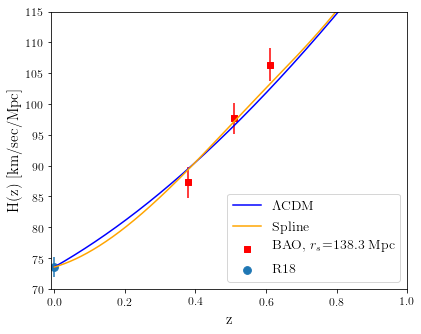

In [14]:
#fig, (ax1) = plt.subplots(1,sharex=True)#,sharey=True)
plt.figure(10)
plt.plot(zgrid4H,HvalsLCDM,label='$\Lambda$CDM',color='b')
plt.plot(zgrid4H,Hvalsnonpar,label='Spline',color='orange')
plt.scatter(zdata,Hzdata,label='BAO, $r_s$=138.3 Mpc',color='r',marker='s',s=30)
plt.errorbar(zdata,Hzdata,yerr=Herrors*rfid/rsBAO,linestyle='None',color='r')
plt.scatter(0,73.52,label='R18',s=60)
plt.errorbar(0,73.52,yerr=1.62,linestyle='None')
plt.legend(loc=4)
plt.ylabel('H(z) [km/sec/Mpc]')
#zdata=np.array(zdata)
#ax2.scatter(zdata,Hresiduals,color='r',marker='s',s=50)
#ax2.errorbar(zdata,Hresiduals,yerr=Herrors*rfid/rs/Hguess,linestyle='None',color='r')
#ax2.plot(zgrid4H,Hvalsnonpar/HvalsLCDM-1,color='orange')
#ax2.axhline(y=0,color='b')
#ax2.set(ylabel='Residuals')
plt.xlabel('z',size=15)
plt.xlim((-0.01,1))
plt.ylim((70,115))
#plt.tight_layout()